In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
html_data='https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
pag=requests.get(html_data)
print(pag) # Prints 200 so it is ok.

In [6]:
pag_texto=pag.text

In [7]:
from bs4 import BeautifulSoup

In [8]:
text_beau=BeautifulSoup(pag_texto,'html.parser')

In [9]:
tablas=text_beau.findAll('table')
print(len(tablas))

6


In [10]:
[(i,v) for i,v in enumerate(list(tablas)) if "Tesla Quarterly Revenue" in v.text]

[(1,
  <table class="historical_data_table table">
  <thead>
  <tr>
  <th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
  </tr>
  </thead>
  <tbody>
  <tr>
  <td style="text-align:center">2022-03-31</td>
  <td style="text-align:center">$18,756</td>
  </tr>
  <tr>
  <td style="text-align:center">2021-12-31</td>
  <td style="text-align:center">$17,719</td>
  </tr>
  <tr>
  <td style="text-align:center">2021-09-30</td>
  <td style="text-align:center">$13,757</td>
  </tr>
  <tr>
  <td style="text-align:center">2021-06-30</td>
  <td style="text-align:center">$11,958</td>
  </tr>
  <tr>
  <td style="text-align:center">2021-03-31</td>
  <td style="text-align:center">$10,389</td>
  </tr>
  <tr>
  <td style="text-align:center">2020-12-31</td>
  <td style="text-align:center">$10,744</td>
  </tr>
  <tr>
  <td style="text-align:center">2020-09-30</td>
  <td style="text-align:center">$8,771</td>
  </tr>
  <tr>
  <td st

La tabla "Tesla Quarterly Revenue" corresponde al elemento 1 de la lista de tablas

In [11]:
tab_rev=[v for v in list(tablas) if "Tesla Quarterly Revenue" in v.text][0]

In [12]:
tr_rev=tab_rev.findAll('tr')

In [13]:
td_rev=tab_rev.findAll('td')
print(td_rev)


[<td style="text-align:center">2022-03-31</td>, <td style="text-align:center">$18,756</td>, <td style="text-align:center">2021-12-31</td>, <td style="text-align:center">$17,719</td>, <td style="text-align:center">2021-09-30</td>, <td style="text-align:center">$13,757</td>, <td style="text-align:center">2021-06-30</td>, <td style="text-align:center">$11,958</td>, <td style="text-align:center">2021-03-31</td>, <td style="text-align:center">$10,389</td>, <td style="text-align:center">2020-12-31</td>, <td style="text-align:center">$10,744</td>, <td style="text-align:center">2020-09-30</td>, <td style="text-align:center">$8,771</td>, <td style="text-align:center">2020-06-30</td>, <td style="text-align:center">$6,036</td>, <td style="text-align:center">2020-03-31</td>, <td style="text-align:center">$5,985</td>, <td style="text-align:center">2019-12-31</td>, <td style="text-align:center">$7,384</td>, <td style="text-align:center">2019-09-30</td>, <td style="text-align:center">$6,303</td>, <td

In [14]:
list_td=[v.findAll('td') for i,v in enumerate(tr_rev)][1:]

In [38]:
# lista con datos de la tabla, filtrando aquellos que estan vacios

list_data=[(v[0].text,v[1].text.replace('$','').replace(',','')) for i,v in enumerate(list_td) if (v[1].text is not str()) & (v[0].text is not str())]

In [39]:
df_tesla=pd.DataFrame(list_data, columns=['Date','Revenue'])

In [41]:
print(df_tesla)

          Date Revenue
0   2022-03-31   18756
1   2021-12-31   17719
2   2021-09-30   13757
3   2021-06-30   11958
4   2021-03-31   10389
5   2020-12-31   10744
6   2020-09-30    8771
7   2020-06-30    6036
8   2020-03-31    5985
9   2019-12-31    7384
10  2019-09-30    6303
11  2019-06-30    6350
12  2019-03-31    4541
13  2018-12-31    7226
14  2018-09-30    6824
15  2018-06-30    4002
16  2018-03-31    3409
17  2017-12-31    3288
18  2017-09-30    2985
19  2017-06-30    2790
20  2017-03-31    2696
21  2016-12-31    2285
22  2016-09-30    2298
23  2016-06-30    1270
24  2016-03-31    1147
25  2015-12-31    1214
26  2015-09-30     937
27  2015-06-30     955
28  2015-03-31     940
29  2014-12-31     957
30  2014-09-30     852
31  2014-06-30     769
32  2014-03-31     621
33  2013-12-31     615
34  2013-09-30     431
35  2013-06-30     405
36  2013-03-31     562
37  2012-12-31     306
38  2012-09-30      50
39  2012-06-30      27
40  2012-03-31      30
41  2011-12-31      39
42  2011-09

In [43]:
type(df_tesla)

pandas.core.frame.DataFrame

#### Insert the data into sqlite3

In [42]:
import sqlite3

In [45]:
records = df_tesla.to_records(index=False)
tuples_rec = list(records)
tuples_rec

[('2022-03-31', '18756'),
 ('2021-12-31', '17719'),
 ('2021-09-30', '13757'),
 ('2021-06-30', '11958'),
 ('2021-03-31', '10389'),
 ('2020-12-31', '10744'),
 ('2020-09-30', '8771'),
 ('2020-06-30', '6036'),
 ('2020-03-31', '5985'),
 ('2019-12-31', '7384'),
 ('2019-09-30', '6303'),
 ('2019-06-30', '6350'),
 ('2019-03-31', '4541'),
 ('2018-12-31', '7226'),
 ('2018-09-30', '6824'),
 ('2018-06-30', '4002'),
 ('2018-03-31', '3409'),
 ('2017-12-31', '3288'),
 ('2017-09-30', '2985'),
 ('2017-06-30', '2790'),
 ('2017-03-31', '2696'),
 ('2016-12-31', '2285'),
 ('2016-09-30', '2298'),
 ('2016-06-30', '1270'),
 ('2016-03-31', '1147'),
 ('2015-12-31', '1214'),
 ('2015-09-30', '937'),
 ('2015-06-30', '955'),
 ('2015-03-31', '940'),
 ('2014-12-31', '957'),
 ('2014-09-30', '852'),
 ('2014-06-30', '769'),
 ('2014-03-31', '621'),
 ('2013-12-31', '615'),
 ('2013-09-30', '431'),
 ('2013-06-30', '405'),
 ('2013-03-31', '562'),
 ('2012-12-31', '306'),
 ('2012-09-30', '50'),
 ('2012-06-30', '27'),
 ('2012-03

## Connect to SQLite

In [47]:
# Conect a connection object

conn=sqlite3.connect('Tesla.db')

In [48]:
# Create a cursor
cur = conn.cursor()

# Create table
cur.execute('''CREATE TABLE revenue
(Date, Revenue)''')

# Insert the values
cur.executemany('INSERT INTO revenue VALUES (?,?)', tuples_rec)

# Save (commit) the changes
conn.commit()

#### Retrive information from the db

In [55]:
#revenue=cur.execute('SELECT * FROM revenue')
df_revenue=pd.read_sql('SELECT * FROM revenue',conn)

In [56]:
print(df_revenue)

          Date Revenue
0   2022-03-31   18756
1   2021-12-31   17719
2   2021-09-30   13757
3   2021-06-30   11958
4   2021-03-31   10389
5   2020-12-31   10744
6   2020-09-30    8771
7   2020-06-30    6036
8   2020-03-31    5985
9   2019-12-31    7384
10  2019-09-30    6303
11  2019-06-30    6350
12  2019-03-31    4541
13  2018-12-31    7226
14  2018-09-30    6824
15  2018-06-30    4002
16  2018-03-31    3409
17  2017-12-31    3288
18  2017-09-30    2985
19  2017-06-30    2790
20  2017-03-31    2696
21  2016-12-31    2285
22  2016-09-30    2298
23  2016-06-30    1270
24  2016-03-31    1147
25  2015-12-31    1214
26  2015-09-30     937
27  2015-06-30     955
28  2015-03-31     940
29  2014-12-31     957
30  2014-09-30     852
31  2014-06-30     769
32  2014-03-31     621
33  2013-12-31     615
34  2013-09-30     431
35  2013-06-30     405
36  2013-03-31     562
37  2012-12-31     306
38  2012-09-30      50
39  2012-06-30      27
40  2012-03-31      30
41  2011-12-31      39
42  2011-09

#### Plot

In [65]:
df_revenue['Revenue']=df_revenue['Revenue'].astype('float64')
df_revenue['Date']=pd.to_datetime(df_revenue['Date'])

In [66]:
df_revenue.dtypes

Date       datetime64[ns]
Revenue           float64
dtype: object

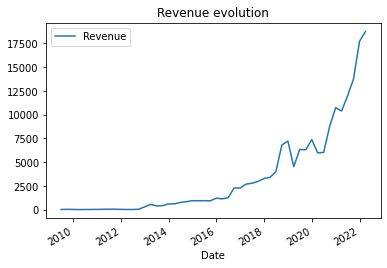

In [70]:
df_revenue.plot('Date','Revenue')
plt.title('Revenue evolution')
plt.xlabel('Date')
plt.show()